In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import pandas as pd
import os

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Endoscope Detection/Yolov11/gastroscopy_meta_256.csv")

In [ ]:
df.head()

,image_id,height,width,organ,lesion_label,location,shape_type_polygon,polygon_mask,bounding_box_shape,x_min,y_min,x_max,y_max,lesion
0,1_1_00011.png,256.0,256.0,gastroscopy,0,1,polygon,"1257.45,738.30;1212.77,748.94;1168.09,748.94;1...",rectangle,95.478723,45.744681,163.031915,93.617021,ulcer
1,1_1_00011.png,256.0,256.0,gastroscopy,0,1,polygon,"1421.28,955.32;1387.23,985.11;1368.09,1025.53;...",rectangle,143.617021,112.234043,177.659574,135.372340,ulcer
2,1_1_00014.png,256.0,256.0,gastroscopy,0,1,polygon,"1065.96,1110.64;1040.43,1148.94;1010.64,1182.9...",rectangle,65.159574,70.212766,134.840426,153.191489,ulcer
3,1_1_00017.png,256.0,256.0,gastroscopy,0,1,polygon,"1246.30,514.89;1197.36,508.51;1154.81,502.13;1...",rectangle,110.574468,62.765957,172.010638,94.148936,ulcer
4,1_1_00018.png,256.0,256.0,gastroscopy,0,1,polygon,"1397.36,389.36;1352.68,382.98;1314.38,404.26;1...",rectangle,145.148936,47.872340,206.851064,134.308511,ulcer


In [ ]:
from sklearn.model_selection import StratifiedKFold
df['label'] = df['image_id'].apply(lambda x: int(x.split('_')[1]))

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in skf.split(df, df['label']):
    train_df = df.iloc[train_index]
    val_df = df.iloc[val_index]

train_df.to_csv('train.csv', index=False)
val_df.to_csv('val.csv', index=False)

In [ ]:
label_df = pd.read_csv('/content/drive/MyDrive/Endoscope Detection/Yolov11/val.csv')
image_folder = r'/content/drive/MyDrive/Endoscope Detection/Yolov11/Dataset/images/val'
label_folder = r'/content/drive/MyDrive/Endoscope Detection/Yolov11/Dataset/labels/val'

os.makedirs(label_folder, exist_ok=True)

for img_id in label_df['image_id']:
    img_file_path = os.path.join(image_folder, img_id)

    if os.path.exists(img_file_path):
        group = df[df['image_id'] == img_id]

        label_file_path = os.path.join(label_folder, f'{img_id.replace(".png", ".txt")}')

        with open(label_file_path, 'w') as label_file:
            for _, row in group.iterrows():
                obj_class = row['lesion_label']

                x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']
                img_width, img_height = row['width'], row['height']

                x_center = (x_min + x_max) / 2 / img_width
                y_center = (y_min + y_max) / 2 / img_height
                width = (x_max - x_min) / img_width
                height = (y_max - y_min) / img_height

                label_file.write(f'{obj_class} {x_center} {y_center} {width} {height}\n')

In [ ]:
!yolo predict model=yolo11n.pt source='https://ultralytics.com/images/zidane.jpg'

100% 5.35M/5.35M [00:00<00:00, 60.3MB/s]
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100% 49.2k/49.2k [00:00<00:00, 3.58MB/s]
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 178.2ms
Speed: 24.1ms preprocess, 178.2ms inference, 40.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
import albumentations as A
from ultralytics.data.augment import Albumentations
from ultralytics.utils import LOGGER, colorstr


def new_init__(self, p=1.00):
        self.p = p
        self.transform = None
        prefix = colorstr("albumentations: ")

        try:
            import albumentations as A

            spatial_transforms = {
                "Affine",
                "BBoxSafeRandomCrop",
                "CenterCrop",
                "CoarseDropout",
                "Crop",
                "CropAndPad",
                "CropNonEmptyMaskIfExists",
                "D4",
                "ElasticTransform",
                "Flip",
                "GridDistortion",
                "GridDropout",
                "HorizontalFlip",
                "Lambda",
                "LongestMaxSize",
                "MaskDropout",
                "MixUp",
                "Morphological",
                "NoOp",
                "OpticalDistortion",
                "PadIfNeeded",
                "Perspective",
                "PiecewiseAffine",
                "PixelDropout",
                "RandomCrop",
                "RandomCropFromBorders",
                "RandomGridShuffle",
                "RandomResizedCrop",
                "RandomRotate90",
                "RandomScale",
                "RandomSizedBBoxSafeCrop",
                "RandomSizedCrop",
                "Resize",
                "Rotate",
                "SafeRotate",
                "ShiftScaleRotate",
                "SmallestMaxSize",
                "Transpose",
                "VerticalFlip",
                "XYMasking",
            }  # from https://albumentations.ai/docs/getting_started/transforms_and_targets/#spatial-level-transforms


            params = {
                 "num_masks_x": (1,2),
                 'num_masks_y': (1,2),
                 'mask_x_length': (10,20),
                 'mask_y_length': (10,20),
                 'fill_value': 0,
                   }

            T = [
                A.CLAHE(clip_limit=(1,3), tile_grid_size=(8, 8), p=0.3),
            ]

            # Compose transforms
            self.contains_spatial = any(transform.__class__.__name__ in spatial_transforms for transform in T)
            self.transform = (
                A.Compose(T, bbox_params=A.BboxParams(format="yolo", label_fields=["class_labels"]))
                if self.contains_spatial
                else A.Compose(T)
            )
            LOGGER.info(prefix + ", ".join(f"{x}".replace("always_apply=False, ", "") for x in T if x.p))
        except ImportError:  # package not installed, skip
            pass
        except Exception as e:
            LOGGER.info(f"{prefix}{e}")

Albumentations.__init__ = new_init__

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.3 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11n.pt")

results = model.train(data="/content/drive/MyDrive/Endoscope Detection/Yolov11/Dataset/data.yaml",
                      project="/content/drive/MyDrive/Endoscope Detection/Yolov11/experiment/v6",
                      epochs = 100,
                      imgsz=256,
                      hsv_h=0.05,#색조 줄이기
                      hsv_s=0.25,#채도
                      hsv_v=0.25,#밝기
                      optimizer = 'auto',
                      degrees=0.10,#각도
                      translate=0.25,#가로세로 변환
                      scale=0.0,
                      shear=0.0,
                      perspective=0.0,
                      flipud=0.0,
                      fliplr=0.4,#좌우반전
                      mosaic=0.3,
                      mixup=0.3,
                      auto_augment="none",
                      erasing=0.0,
                      copy_paste=0.0
                      )


Ultralytics 8.3.71 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/Endoscope Detection/Yolov11/Dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Endoscope Detection/Yolov11/experiment/v6, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning /content/drive/MyDrive/Endoscope Detection/Yolov11/Dataset/labels/train.cache... 1280 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1280/1280 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Endoscope Detection/Yolov11/Dataset/images/train/1_1_00024.png: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Endoscope Detection/Yolov11/Dataset/images/train/1_1_00027.png: 1 duplicate labels removed
albumentations: CLAHE(p=0.3, clip_limit=(1, 3), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Endoscope Detection/Yolov11/Dataset/labels/val.cache... 320 images, 0 backgrounds, 0 corrupt: 100%|██████████| 320/320 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/Endoscope Detection/Yolov11/experiment/v6/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Endoscope Detection/Yolov11/experiment/v6/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.516G      1.571      2.997       1.56         34        256: 100%|██████████| 80/80 [06:05<00:00,  4.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.03it/s]

                   all        320        450      0.407      0.252      0.275      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.489G      1.695      2.411      1.629         29        256: 100%|██████████| 80/80 [00:22<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.67it/s]

                   all        320        450      0.299      0.308      0.215     0.0969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.487G      1.676      2.313      1.628         39        256: 100%|██████████| 80/80 [00:25<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.84it/s]

                   all        320        450      0.305      0.278      0.251      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      0.48G       1.69      2.276      1.626         35        256: 100%|██████████| 80/80 [00:22<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.68it/s]

                   all        320        450      0.369      0.358       0.29      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      0.48G      1.664      2.135      1.596         34        256: 100%|██████████| 80/80 [00:24<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.38it/s]

                   all        320        450      0.371      0.369      0.291       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      0.48G      1.597      2.098      1.548         38        256: 100%|██████████| 80/80 [00:22<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

                   all        320        450      0.421      0.446      0.402      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      0.48G      1.564      2.011      1.533         38        256: 100%|██████████| 80/80 [00:22<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

                   all        320        450      0.503      0.476      0.433      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      0.48G      1.544      1.971      1.531         42        256: 100%|██████████| 80/80 [00:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.49it/s]

                   all        320        450      0.504      0.439      0.429      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      0.48G        1.5      1.894      1.506         46        256: 100%|██████████| 80/80 [00:22<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.15it/s]

                   all        320        450      0.616      0.464      0.512       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.478G       1.51      1.906      1.486         35        256: 100%|██████████| 80/80 [00:23<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.50it/s]

                   all        320        450       0.54      0.498      0.488      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      0.48G      1.477      1.852      1.471         41        256: 100%|██████████| 80/80 [00:24<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.06it/s]

                   all        320        450      0.532      0.494       0.46      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.478G      1.479      1.811      1.471         37        256: 100%|██████████| 80/80 [00:25<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]

                   all        320        450      0.574      0.473      0.498      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      0.48G      1.468      1.799      1.484         29        256: 100%|██████████| 80/80 [00:22<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.77it/s]

                   all        320        450      0.464      0.513      0.449      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.478G      1.449      1.778      1.471         34        256: 100%|██████████| 80/80 [00:24<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

                   all        320        450      0.557      0.456      0.458      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      0.48G      1.422      1.731      1.454         38        256: 100%|██████████| 80/80 [00:22<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.68it/s]

                   all        320        450      0.569      0.508      0.527      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      0.48G      1.391      1.714      1.435         26        256: 100%|██████████| 80/80 [00:23<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]

                   all        320        450      0.541      0.536      0.498      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.478G      1.418      1.715      1.451         53        256: 100%|██████████| 80/80 [00:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.76it/s]

                   all        320        450      0.584       0.49      0.511      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.478G      1.386      1.684      1.426         24        256: 100%|██████████| 80/80 [00:23<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.08it/s]

                   all        320        450      0.583       0.52      0.551      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      0.48G      1.405      1.738      1.453         43        256: 100%|██████████| 80/80 [00:22<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.38it/s]

                   all        320        450      0.599      0.533      0.549      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.478G      1.345       1.66       1.42         40        256: 100%|██████████| 80/80 [00:22<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.67it/s]

                   all        320        450      0.664      0.488      0.557      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.478G      1.361      1.647       1.42         34        256: 100%|██████████| 80/80 [00:24<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.91it/s]

                   all        320        450      0.655      0.478      0.543      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.478G      1.366      1.657      1.416         53        256: 100%|██████████| 80/80 [00:25<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]

                   all        320        450      0.626      0.536      0.552      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.478G      1.352      1.619      1.423         32        256: 100%|██████████| 80/80 [00:23<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

                   all        320        450      0.606      0.531      0.556      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      0.48G      1.338      1.605      1.394         37        256: 100%|██████████| 80/80 [00:22<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]

                   all        320        450      0.647      0.552      0.579      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      0.48G      1.316      1.589      1.391         27        256: 100%|██████████| 80/80 [00:23<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.60it/s]

                   all        320        450      0.661      0.567      0.574      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      0.48G      1.347      1.628      1.401         40        256: 100%|██████████| 80/80 [00:22<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.72it/s]

                   all        320        450      0.663      0.554       0.59      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      0.48G      1.334      1.567      1.392         28        256: 100%|██████████| 80/80 [00:23<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]

                   all        320        450       0.65      0.495      0.548      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      0.48G      1.308      1.544      1.378         33        256: 100%|██████████| 80/80 [00:22<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.94it/s]

                   all        320        450      0.656      0.541      0.577      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.478G      1.268      1.532       1.37         30        256: 100%|██████████| 80/80 [00:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.55it/s]

                   all        320        450      0.689      0.531      0.573      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.478G      1.285      1.524       1.38         42        256: 100%|██████████| 80/80 [00:23<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.90it/s]

                   all        320        450      0.574      0.566      0.558        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      0.48G      1.309      1.502      1.371         28        256: 100%|██████████| 80/80 [00:22<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.98it/s]

                   all        320        450      0.635      0.559      0.572      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.478G      1.295       1.56       1.37         28        256: 100%|██████████| 80/80 [00:23<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]

                   all        320        450      0.625      0.566      0.588      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      0.48G      1.288      1.519      1.373         38        256: 100%|██████████| 80/80 [00:26<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

                   all        320        450      0.587      0.554      0.548      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      0.48G      1.277      1.522      1.367         37        256: 100%|██████████| 80/80 [00:22<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.88it/s]

                   all        320        450      0.703      0.524      0.599      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.478G      1.298      1.534      1.381         40        256: 100%|██████████| 80/80 [00:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.99it/s]

                   all        320        450       0.66      0.579      0.611      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      0.48G      1.265      1.491      1.361         25        256: 100%|██████████| 80/80 [00:21<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.38it/s]

                   all        320        450      0.608      0.613      0.604      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.478G      1.253       1.46      1.343         42        256: 100%|██████████| 80/80 [00:22<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]

                   all        320        450      0.682      0.557      0.606      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.478G      1.242      1.468      1.353         29        256: 100%|██████████| 80/80 [00:23<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.75it/s]

                   all        320        450      0.642      0.537      0.581      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.478G      1.243      1.452      1.333         32        256: 100%|██████████| 80/80 [00:22<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.65it/s]

                   all        320        450      0.689      0.579      0.607      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.478G      1.237      1.471      1.343         29        256: 100%|██████████| 80/80 [00:24<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]

                   all        320        450      0.626      0.577      0.596       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      0.48G       1.26      1.469      1.358         46        256: 100%|██████████| 80/80 [00:22<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.54it/s]

                   all        320        450      0.632      0.599      0.604      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.478G       1.25      1.443      1.343         28        256: 100%|██████████| 80/80 [00:24<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.86it/s]

                   all        320        450      0.678       0.59      0.631      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.478G       1.24      1.424      1.347         39        256: 100%|██████████| 80/80 [00:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.78it/s]


                   all        320        450      0.669      0.575      0.603      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      0.48G      1.229      1.414      1.329         43        256: 100%|██████████| 80/80 [00:27<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.58it/s]

                   all        320        450      0.627      0.605      0.625      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      0.48G      1.219      1.383      1.312         30        256: 100%|██████████| 80/80 [00:22<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.75it/s]

                   all        320        450      0.638      0.578      0.575      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      0.48G      1.183       1.39      1.311         37        256: 100%|██████████| 80/80 [00:23<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]

                   all        320        450      0.722      0.557      0.617      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.478G      1.173      1.382      1.311         33        256: 100%|██████████| 80/80 [00:21<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.94it/s]

                   all        320        450      0.699      0.564      0.616      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.478G      1.206       1.39      1.321         36        256: 100%|██████████| 80/80 [00:22<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        320        450      0.757      0.562      0.631      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.478G      1.201      1.383       1.32         35        256: 100%|██████████| 80/80 [00:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.40it/s]

                   all        320        450      0.644      0.598      0.605      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.478G      1.168      1.344      1.307         29        256: 100%|██████████| 80/80 [00:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]

                   all        320        450      0.707      0.541      0.613      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.478G      1.204      1.383      1.323         31        256: 100%|██████████| 80/80 [00:22<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]

                   all        320        450      0.712      0.589      0.613      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.478G      1.171      1.346      1.306         32        256: 100%|██████████| 80/80 [00:21<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]

                   all        320        450      0.678      0.605      0.617      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.478G      1.176      1.362      1.313         29        256: 100%|██████████| 80/80 [00:22<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.65it/s]

                   all        320        450      0.644      0.577       0.61      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.478G      1.178      1.321      1.303         29        256: 100%|██████████| 80/80 [00:21<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.84it/s]

                   all        320        450      0.682      0.569       0.61       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.478G      1.105      1.278      1.267         26        256: 100%|██████████| 80/80 [00:24<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

                   all        320        450      0.703      0.573      0.633      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.478G      1.122      1.282      1.276         34        256: 100%|██████████| 80/80 [00:22<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.88it/s]

                   all        320        450      0.657      0.599      0.623      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.478G      1.132      1.271      1.283         33        256: 100%|██████████| 80/80 [00:24<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.03it/s]

                   all        320        450      0.688      0.621      0.649      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.478G      1.161      1.286        1.3         19        256: 100%|██████████| 80/80 [00:22<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.83it/s]

                   all        320        450      0.679      0.587      0.612      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.478G      1.122      1.268      1.289         35        256: 100%|██████████| 80/80 [00:23<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.06it/s]

                   all        320        450      0.691      0.606      0.626       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.478G      1.152      1.284      1.287         38        256: 100%|██████████| 80/80 [00:21<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

                   all        320        450      0.699      0.608      0.626      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.478G      1.126      1.267      1.288         37        256: 100%|██████████| 80/80 [00:22<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

                   all        320        450      0.685      0.604      0.631      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.478G      1.171      1.308      1.302         23        256: 100%|██████████| 80/80 [00:21<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.31it/s]

                   all        320        450      0.661      0.594      0.613      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.478G      1.129      1.263      1.271         36        256: 100%|██████████| 80/80 [00:22<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.18it/s]

                   all        320        450      0.738      0.596      0.643      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.478G      1.111      1.241       1.27         34        256: 100%|██████████| 80/80 [00:22<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.80it/s]

                   all        320        450      0.741      0.599      0.649      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.478G      1.097      1.231      1.264         35        256: 100%|██████████| 80/80 [00:21<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.55it/s]

                   all        320        450      0.677      0.596       0.62       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.478G      1.125      1.243      1.273         26        256: 100%|██████████| 80/80 [00:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.21it/s]

                   all        320        450      0.708      0.633       0.65      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.478G      1.095      1.203      1.259         32        256: 100%|██████████| 80/80 [00:24<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

                   all        320        450      0.703      0.617      0.647      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.478G      1.117      1.224       1.27         30        256: 100%|██████████| 80/80 [00:22<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.74it/s]

                   all        320        450      0.668      0.635      0.618      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.478G      1.094      1.216      1.266         29        256: 100%|██████████| 80/80 [00:21<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.58it/s]

                   all        320        450      0.766      0.607      0.663      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.478G      1.076      1.199      1.245         34        256: 100%|██████████| 80/80 [00:23<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]

                   all        320        450      0.766      0.592      0.658      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.478G      1.081      1.164      1.252         38        256: 100%|██████████| 80/80 [00:21<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.24it/s]

                   all        320        450      0.718      0.626      0.649      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.478G      1.048      1.162       1.24         34        256: 100%|██████████| 80/80 [00:23<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.31it/s]

                   all        320        450      0.748       0.62      0.662       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.478G      1.074      1.194      1.248         25        256: 100%|██████████| 80/80 [00:22<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.76it/s]

                   all        320        450      0.701      0.612       0.65      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.478G       1.04      1.142      1.232         36        256: 100%|██████████| 80/80 [00:24<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.76it/s]

                   all        320        450       0.71      0.609      0.651      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.478G      1.069      1.158      1.236         23        256: 100%|██████████| 80/80 [00:22<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]

                   all        320        450      0.758      0.616      0.669      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.478G      1.056      1.163      1.235         49        256: 100%|██████████| 80/80 [00:23<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.16it/s]

                   all        320        450       0.69      0.654      0.668      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.478G      1.054      1.126      1.224         40        256: 100%|██████████| 80/80 [00:21<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.57it/s]

                   all        320        450      0.752      0.611      0.662       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      0.48G      1.043      1.116      1.224         33        256: 100%|██████████| 80/80 [00:27<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.53it/s]

                   all        320        450      0.711      0.617       0.65      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.478G      1.038       1.14      1.224         25        256: 100%|██████████| 80/80 [00:21<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.65it/s]

                   all        320        450      0.716      0.622      0.657      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.478G      1.057      1.115      1.234         33        256: 100%|██████████| 80/80 [00:23<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]

                   all        320        450      0.709      0.602       0.65      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.478G      1.033      1.133      1.233         32        256: 100%|██████████| 80/80 [00:22<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.53it/s]

                   all        320        450       0.79      0.557      0.659      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.478G      1.018      1.114      1.214         31        256: 100%|██████████| 80/80 [00:22<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

                   all        320        450      0.759      0.609      0.671      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.478G      1.055      1.147       1.24         37        256: 100%|██████████| 80/80 [00:23<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.90it/s]

                   all        320        450      0.771      0.625      0.674      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.478G      1.021      1.113      1.226         26        256: 100%|██████████| 80/80 [00:22<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.17it/s]

                   all        320        450      0.678      0.643      0.656      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.478G      1.032       1.11       1.23         34        256: 100%|██████████| 80/80 [00:24<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]

                   all        320        450      0.738      0.636      0.671      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.478G      1.022      1.105      1.216         40        256: 100%|██████████| 80/80 [00:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.69it/s]

                   all        320        450      0.732      0.622      0.673      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.478G      1.017      1.091      1.221         27        256: 100%|██████████| 80/80 [00:24<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.51it/s]

                   all        320        450      0.753      0.637      0.681      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.478G     0.9823      1.085      1.202         45        256: 100%|██████████| 80/80 [00:21<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

                   all        320        450      0.745      0.609       0.67      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.478G     0.9715      1.059      1.196         36        256: 100%|██████████| 80/80 [00:27<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.95it/s]

                   all        320        450      0.737      0.635      0.671      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.478G     0.9973      1.062      1.203         34        256: 100%|██████████| 80/80 [00:21<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.83it/s]

                   all        320        450       0.75      0.613      0.666      0.376


Closing dataloader mosaic
albumentations: CLAHE(p=0.3, clip_limit=(1, 3), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.478G     0.7811     0.7514      1.052         19        256: 100%|██████████| 80/80 [00:21<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.00it/s]

                   all        320        450       0.79      0.586      0.663       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.478G     0.7628     0.6802      1.049         26        256: 100%|██████████| 80/80 [00:19<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]

                   all        320        450      0.789      0.593      0.673      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.478G     0.7635     0.6769      1.038         20        256: 100%|██████████| 80/80 [00:20<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.23it/s]

                   all        320        450      0.741       0.63       0.68      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.478G      0.756      0.677      1.031         24        256: 100%|██████████| 80/80 [00:20<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]

                   all        320        450      0.767      0.615      0.666      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.478G      0.752     0.6563      1.032         27        256: 100%|██████████| 80/80 [00:19<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]

                   all        320        450      0.753      0.607       0.67      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.478G     0.7377     0.6433      1.026         18        256: 100%|██████████| 80/80 [00:19<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.64it/s]

                   all        320        450      0.753      0.622      0.677      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.478G     0.7308      0.635       1.03         30        256: 100%|██████████| 80/80 [00:20<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.53it/s]

                   all        320        450      0.755      0.607      0.663      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.478G     0.7239     0.6432      1.029         20        256: 100%|██████████| 80/80 [00:19<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]

                   all        320        450      0.751      0.612      0.666      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.478G     0.7176     0.6228      1.014         21        256: 100%|██████████| 80/80 [00:20<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.19it/s]

                   all        320        450        0.8      0.592      0.668      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.478G      0.723     0.6242      1.017         23        256: 100%|██████████| 80/80 [00:20<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.38it/s]

                   all        320        450      0.733      0.636      0.675      0.373



100 epochs completed in 0.860 hours.
Optimizer stripped from /content/drive/MyDrive/Endoscope Detection/Yolov11/experiment/v6/train2/weights/last.pt, 5.4MB
Optimizer stripped from /content/drive/MyDrive/Endoscope Detection/Yolov11/experiment/v6/train2/weights/best.pt, 5.4MB

Validating /content/drive/MyDrive/Endoscope Detection/Yolov11/experiment/v6/train2/weights/best.pt...
Ultralytics 8.3.71 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.16it/s]


                   all        320        450      0.752      0.637      0.681      0.383
                 ulcer         80        108      0.689      0.481      0.541       0.28
                 polyp         80        148      0.811       0.73      0.768      0.436
                cancer        160        194      0.756      0.701      0.733      0.433
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to /content/drive/MyDrive/Endoscope Detection/Yolov11/experiment/v6/train2


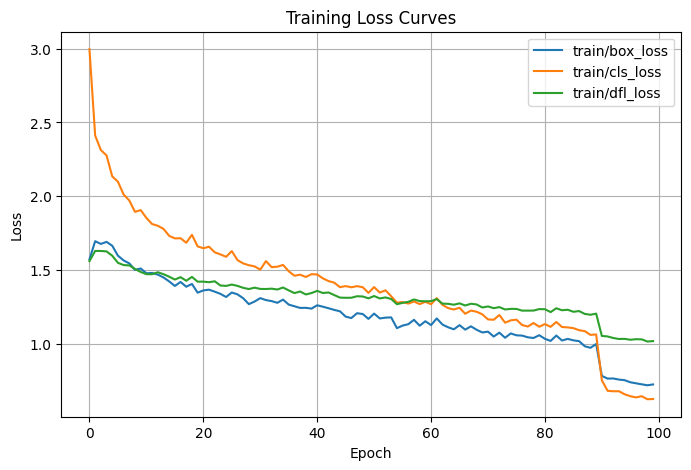

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Endoscope Detection/Yolov11/experiment/v6/train2/results.csv")

plt.figure(figsize=(8, 5))
plt.plot(df["train/box_loss"], label="train/box_loss")
plt.plot(df["train/cls_loss"], label="train/cls_loss")
plt.plot(df["train/dfl_loss"], label="train/dfl_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curves")
plt.legend()
plt.grid()
plt.show()